## 加载数据

In [1]:
import pandas as pd

# 1. 数据加载
data = pd.read_csv("battery_compounds.csv")
data

,Conductivity,Density,Atomic_Radius,is_anode_material
0,3.745401,1.925665,63.085284,0
1,9.507143,3.709505,62.348940,0
2,7.319939,5.364729,95.312729,0
3,5.986585,4.661124,62.477310,0
4,1.560186,5.032806,63.597486,0
...,...,...,...,...
995,0.915821,4.284776,93.264788,0
996,9.173136,5.783073,57.863660,0
997,1.368186,1.344790,65.489393,0
998,9.502374,1.285274,64.502277,0


## 可视化原始数据

/Users/yaweiliu/usr/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yaweiliu/usr/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yaweiliu/usr/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yaweiliu/usr/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

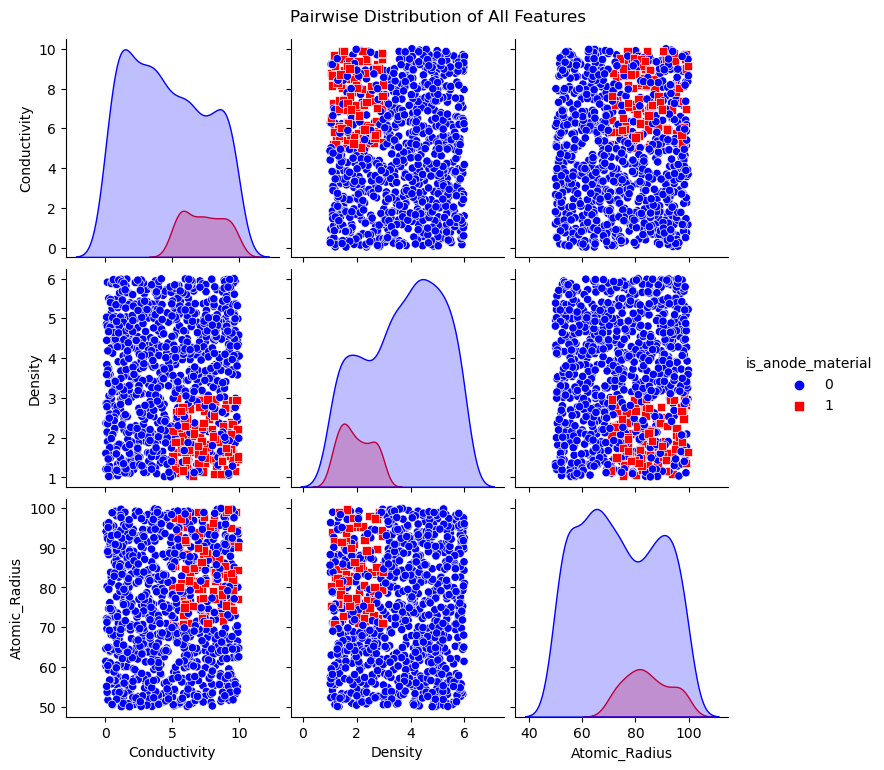

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv("battery_compounds.csv")

# 使用seaborn的pairplot绘制所有特征的二维图
sns.pairplot(data, hue='is_anode_material', markers=["o", "s"], palette={0: 'blue', 1: 'red'})

plt.suptitle('Pairwise Distribution of All Features', y=1.02)
plt.show()

## 机器学习：SVM分类、模型评价报告、可视化测试集结果

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       174
           1       0.50      0.31      0.38        26

    accuracy                           0.87       200
   macro avg       0.70      0.63      0.65       200
weighted avg       0.85      0.87      0.86       200



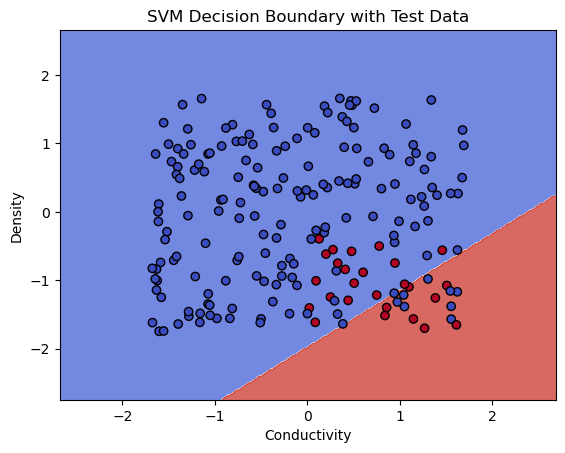

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 读取数据
data = pd.read_csv("battery_compounds.csv")
X = data[['Conductivity', 'Density']]
y = data['is_anode_material']

# 数据预处理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用SVM进行分类
clf = SVC(kernel='linear',C=1.0)  
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# 输出模型评估报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 可视化测试集结果
h = .02
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Conductivity')
plt.ylabel('Density')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Decision Boundary with Test Data')
plt.show()